In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn import linear_model

from sklearn import ensemble

from sklearn.decomposition import PCA

import pickle
import datetime as dt

In [58]:
# Import data
sensors = pd.read_csv('../data/sensors.csv', sep=',')
target = pd.read_csv('../data/coke_target.csv', sep=',')

sensors.drop(columns=['f_36', 'f_37', 'f_38', 'f_39', 'f_40', 'f_17', 'f_26', 'f_32'], inplace=True)

sensors.fillna(method='ffill', inplace=True)
sensors.f_0.fillna(98.912665, inplace=True)
sensors.f_1.fillna(0.336871, inplace=True)
sensors.f_2.fillna(27.897405, inplace=True)
sensors.f_41.fillna(-0.029044, inplace=True)
sensors.f_42.fillna(0.016089, inplace=True)

fields = sensors.columns[1:].tolist()

#for col in fields:
#    sensors[col] = pd.qcut(sensors[col], 25, range(25)).astype(int) / 25

# Moving average
#for col in fields:
#    sensors[col + '_ma'] = sensors[col].rolling(window=100, center=False).mean()
    #sensors[col + '_ma'] = sensors[col].ewm(span=100).mean()
    
#predictors = [f + '_ma' for f in fields]
predictors = [f for f in fields]
    
scaler = RobustScaler()
scaler.fit(sensors.loc[:, predictors])
sensors.loc[:, predictors] = scaler.transform(sensors.loc[:, predictors])

sensors = sensors.merge(target, on='timestamp', how='left')

dm = lambda x: dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S')
sensors['timestamp'] = sensors['timestamp'].apply(dm)

sensors.head()

,timestamp,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_27,f_28,f_29,f_30,f_31,f_33,f_34,f_35,f_41,f_42,f_43,f_44,f_45,f_46,f_47,target
0,2016-10-24 16:00:00,-1.014061,1.084468,1.133014,-0.345055,1.405127,0.626278,1.946424,1.250064,0.335571,0.371503,0.351823,0.059823,-0.007473,-0.057028,-0.347728,-0.987048,-0.071232,-1.000540,-1.508852,-0.462300,-1.532329,-2.095596,-0.709871,0.266733,-0.747114,-0.918509,0.220624,-0.388239,1.380670,-0.702217,0.796051,-0.000165,1.037219,-0.973705,0.433428,-0.040518,0.286239,-0.065763,-0.616829,0.458680,2.714220
1,2016-10-24 17:00:00,-1.014061,1.084468,1.133014,5.865843,1.462393,0.294986,1.663147,1.531711,0.355971,0.309652,0.295428,-0.005704,-0.090500,-0.045751,-0.346305,-1.119219,0.195110,-0.859605,0.120033,0.567547,-0.581188,-2.027736,-0.236454,0.494896,-1.040589,-0.019021,0.388779,-0.294690,0.456922,0.513642,0.821875,-0.043773,0.982691,-0.973705,0.433428,-0.025574,0.315177,-0.152934,2.095245,0.480790,2.709524
2,2016-10-24 18:00:00,-1.014061,1.084468,1.133014,-0.314726,1.422149,-0.165981,1.591992,1.506434,0.317280,0.338323,0.374201,-0.049833,-0.015511,-0.014989,-0.604893,-1.049516,-0.916167,-1.045999,-0.741117,-0.289088,-0.911034,-2.060088,-0.048083,-0.123459,-0.718896,-0.429619,-0.350277,-0.326765,0.673791,-1.364582,0.830888,0.030349,0.942364,-0.973705,0.433428,-0.103199,0.345158,-0.188777,0.038832,0.466016,2.709705
3,2016-10-24 19:00:00,-1.014061,1.084468,1.133014,7.471516,1.455107,-0.452224,1.514714,0.551947,0.329866,0.362754,0.358570,-0.163313,-0.141481,-0.188951,-0.328161,-1.018799,0.595395,-0.981117,-0.870344,-0.684535,-0.457882,-2.012665,-0.150102,-0.191562,0.943152,-1.632334,-0.167962,-0.658526,1.194515,-0.032289,0.852215,-0.037448,1.004732,-0.973705,0.433428,-0.091435,0.317794,-0.155746,0.454568,0.431213,2.715567
4,2016-10-24 20:00:00,-1.014062,1.084469,1.133013,1.001220,1.395980,0.414936,1.692251,0.406420,0.279406,0.300015,0.329272,-0.033201,-0.149697,-0.115848,0.054876,-1.068918,-0.639444,-1.250456,-0.008395,-0.172825,-0.422564,-1.908003,0.206768,0.675653,0.598105,-1.370354,0.833215,-1.247324,-0.466213,1.122423,0.855049,0.014727,0.954072,-0.973705,0.433428,-0.080809,0.275404,-0.274711,0.275122,0.390631,2.706246


Test RMSE: 0.15699455953732463
Train RMSE: 0.07858240258455923


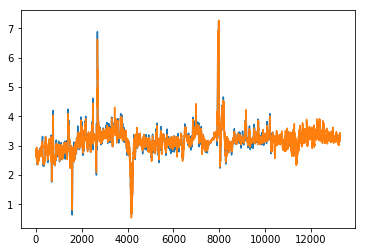

In [59]:
X = sensors.loc[:10399, predictors]
y = sensors.loc[:10399, 'target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

params = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 2, 'learning_rate': 0.05, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

print("Test RMSE: {}".format(np.sqrt(mean_squared_error(y_test, clf.predict(X_test)))))
print("Train RMSE: {}".format(np.sqrt(mean_squared_error(y_train, clf.predict(X_train)))))

plt.plot(sensors.loc[:10399,'target'])
plt.plot(clf.predict(sensors.loc[:, predictors]))
plt.show()


In [61]:
# Export result to sumbission file
sensors_score = sensors.loc[10400:, :].copy()
sensors_score['target'] = clf.predict(sensors_score.loc[:, predictors]) + 0.055
sensors_score.loc[:, ['timestamp', 'target']].to_csv('../data/submissions/coke_submission.csv', index=False)